In [2]:

import numpy as np
import os
from pathlib import Path

import matplotlib.pyplot as plt
from keras.preprocessing import image

p = Path("train/")
dirs = p.glob("*")
labels_dict = {'PNEUMONIA':0, 'NORMAL':1}

image_data = []
labels = []    

for folder_dir in dirs:
    label = str(folder_dir).split("/")[-1][:len(str(folder_dir))]
    
    for img_path in folder_dir.glob("*.jpeg"):
        img = image.load_img(img_path, target_size=(32,32))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(labels_dict[label])

Using TensorFlow backend.


In [3]:
print(len(labels))
print(len(image_data))

5216
5216


In [5]:
#convert data to numpy array 

image_data = np.array(image_data, dtype='float32')/255.0
labels = np.array(labels)

print(image_data.shape, labels.shape)
print(image_data)

(5216, 32, 32, 3) (5216,)
[[[[3.1218762e-03 3.1218762e-03 3.1218762e-03]
   [2.0453674e-03 2.0453674e-03 2.0453674e-03]
   [7.2279893e-04 7.2279893e-04 7.2279893e-04]
   ...
   [7.0742023e-04 7.0742023e-04 7.0742023e-04]
   [2.3221839e-03 2.3221839e-03 2.3221839e-03]
   [3.1526336e-03 3.1526336e-03 3.1526336e-03]]

  [[3.1218762e-03 3.1218762e-03 3.1218762e-03]
   [1.6916571e-03 1.6916571e-03 1.6916571e-03]
   [4.7673972e-04 4.7673972e-04 4.7673972e-04]
   ...
   [6.3052675e-04 6.3052675e-04 6.3052675e-04]
   [2.3221839e-03 2.3221839e-03 2.3221839e-03]
   [3.0449827e-03 3.0449827e-03 3.0449827e-03]]

  [[3.0911188e-03 3.0911188e-03 3.0911188e-03]
   [1.7070358e-03 1.7070358e-03 1.7070358e-03]
   [6.9204153e-04 6.9204153e-04 6.9204153e-04]
   ...
   [3.6908881e-04 3.6908881e-04 3.6908881e-04]
   [1.7685506e-03 1.7685506e-03 1.7685506e-03]
   [3.0142253e-03 3.0142253e-03 3.0142253e-03]]

  ...

  [[1.6916571e-04 1.6916571e-04 1.6916571e-04]
   [9.5347944e-04 9.5347944e-04 9.5347944e-04]


In [7]:

## Randomly shuffle data

import random 
combined = list(zip(image_data, labels))
random.shuffle(combined)

image_data[:], labels[:] = zip(*combined)

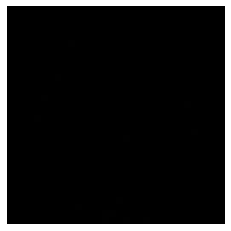

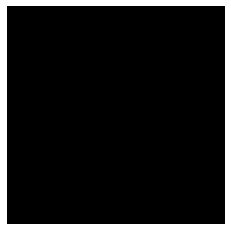

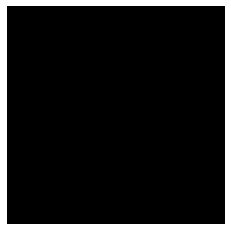

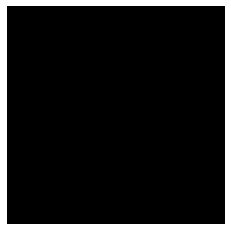

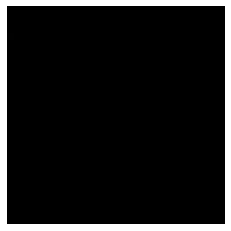

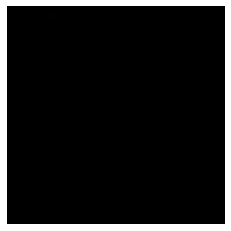

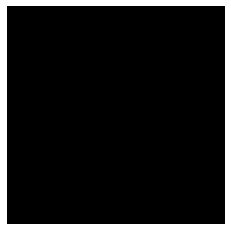

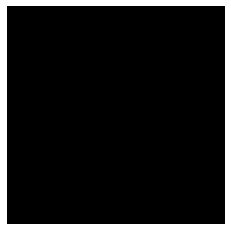

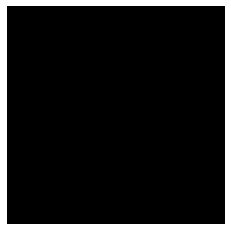

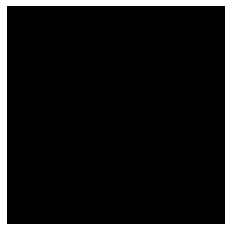

In [8]:

## Visualize the data

def drawImg(img):
    import matplotlib.pyplot as plt
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return

for i in range(10):
    drawImg(image_data[i])